# Procesamiento de datos
Los datos se leen de un bloc de notas.

In [58]:
# Librerias
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

In [7]:
# Lectura de datos

medidas = open("myFile.txt")
linea = (medidas.readline()).split(';')
linea

['0',
 'star',
 '0',
 '0',
 '1',
 '6',
 '61656',
 '0',
 '14985',
 '61',
 '896',
 '218',
 '204',
 '54',
 '10',
 '49',
 '148',
 '38',
 '61',
 '92',
 '136',
 '-42',
 '65',
 '112',
 '102',
 '7',
 '1',
 '12740',
 '968',
 '491',
 '284',
 '106',
 '59',
 '5',
 '55',
 '142',
 '27',
 '159',
 '25',
 '43',
 '0',
 '62',
 '112',
 '97',
 '8',
 '2',
 '10062',
 '323',
 '479',
 '242',
 '77',
 '54',
 '3',
 '61',
 '121',
 '33',
 '115',
 '40',
 '0',
 '0',
 '50',
 '112',
 '84',
 '8',
 '3',
 '9843',
 '640',
 '482',
 '259',
 '87',
 '46',
 '5',
 '56',
 '129',
 '14',
 '77',
 '15',
 '216',
 '0',
 '66',
 '112',
 '104',
 '6',
 '4',
 '7133',
 '1228',
 '910',
 '147',
 '180',
 '48',
 '10',
 '44',
 '115',
 '22',
 '36',
 '60',
 '134',
 '50',
 '85',
 '112',
 '105',
 '5',
 '5',
 '6893',
 '1214',
 '39',
 '390',
 '135',
 '12',
 '22',
 '23',
 '206',
 '23',
 '27',
 '88',
 '89',
 '164',
 '31',
 '112',
 '104',
 '6',
 'stop',
 '2023-05-30 14:48:35.872228\n']

In [9]:
# Datos de la muestra
# Muestra 0
muestra = int(linea[0])

# MODELO
# Validacion del modelo
validacion_modelo = bool(linea[2])

# ID del ROI
id_ROI = int(linea[3])

# Validacion del ROI
validacion_ROI = bool(linea[4])

# Numero de objeto
n_objetos = int(linea[5])

# Superficie total
superficie_total = float(linea[6])

# Imprimir
print("Muestra                    : ", muestra)
print("Validacion del modelo      : ", validacion_modelo)
print("ID del ROI                 : ", id_ROI)
print("Validacion del ROI         : ", validacion_ROI)
print("N° de objeto               : ", n_objetos)
print("Superficie total           : ", superficie_total)

Muestra                    :  0
Validacion del modelo      :  True
ID del ROI                 :  0
Validacion del ROI         :  True
N° de objeto               :  6
Superficie total           :  61656


In [63]:
# Datos de los objetos
id_objeto = []    # 7
posx = []         # 9
posy = []         # 10
ancho = []        # 11
altura = []       # 12
th = []           # 21

In [64]:
for i in range(n_objetos):
  id_objeto.append(float(linea[7+19*i]))
  posx.append(float(linea[9+19*i]))
  posy.append(float(linea[10+19*i]))
  ancho.append(float(linea[11+19*i]))
  altura.append(float(linea[12+19*i]))
  th.append(float(linea[21+19*i]))

In [65]:
print(id_objeto)
print(posx)
print(posy)
print(ancho)
print(altura)
print(th)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[61.0, 968.0, 323.0, 640.0, 1228.0, 1214.0]
[896.0, 491.0, 479.0, 482.0, 910.0, 39.0]
[218.0, 284.0, 242.0, 259.0, 147.0, 390.0]
[204.0, 106.0, 77.0, 87.0, 180.0, 135.0]
[-42.0, 0.0, 0.0, 0.0, 50.0, 164.0]


In [66]:
# Transformación de ancho y altura
for i in range(n_objetos):
  ancho[i] = ancho[i]*68.2/1280
  altura[i] = altura[i]*51.1/960

print("Posición en X     :", posx)
print("Posición en Y     :", posy)
print("Ancho del objeto  :", ancho)
print("Altura del objeto :", altura)

Posición en X     : [61.0, 968.0, 323.0, 640.0, 1228.0, 1214.0]
Posición en Y     : [896.0, 491.0, 479.0, 482.0, 910.0, 39.0]
Ancho del objeto  : [11.6153125, 15.131874999999999, 12.8940625, 13.799843749999999, 7.83234375, 20.7796875]
Altura del objeto : [10.858749999999999, 5.642291666666667, 4.098645833333333, 4.6309375, 9.58125, 7.1859375]


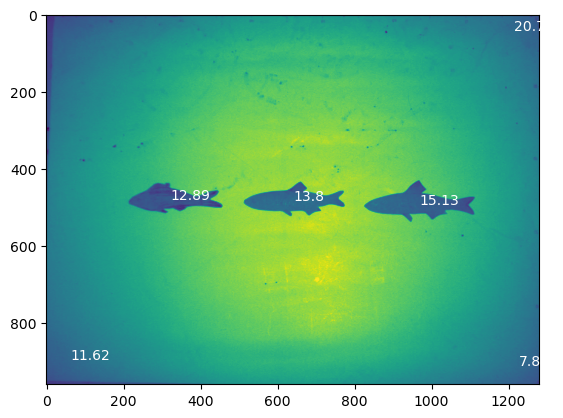

In [71]:
# Imagen del pescado

image = img.imread('my_folder/20230530-144852_image_ID_1_number_000018.jpg')
plt.imshow(image)


for i in range(n_objetos):
  plt.text(posx[i], posy[i], round(ancho[i],2), fontsize=10, color='white')

plt.show()

In [120]:
# Lista de peces y longitud
longitud = [x/10 for x in range(100, 160, 5)]  # desde 10 hasta 15.5
n_peces = [x*0 for x in range(100, 160, 5)]

for j in range(len(longitud)):
  for i in range(n_objetos):
    if 9.75 + j*0.5 < ancho[i] < 10.5 + j*0.5:
      n_peces[j] = n_peces[j] + 1
      print(ancho[i])

11.6153125
12.8940625
12.8940625
13.799843749999999
13.799843749999999
15.131874999999999


In [121]:
# Longitud y cantidad de peces
print("Longitud", "N° peces")

for j in range(len(longitud)):
  print(" ", longitud[j], "   ", n_peces[j])

Longitud N° peces
  10.0     0
  10.5     0
  11.0     0
  11.5     1
  12.0     0
  12.5     1
  13.0     1
  13.5     1
  14.0     1
  14.5     0
  15.0     1
  15.5     0


In [117]:
longitud

[10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5]

In [118]:
ancho

[11.6153125,
 15.131874999999999,
 12.8940625,
 13.799843749999999,
 7.83234375,
 20.7796875]